In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
import os, sys
sys.path.append(os.path.join("..", "..", "lib"))

import gen_2d_fun
import function_bases as bases

In [6]:
with h5py.File("../../../data/dendritic_computation_fourier_example.h5", "r") as f:
    sigmas = f["SIGMAS"][()]
    n_repeat = f["REPEAT"][()]
    Es_add = f["Es_add"][()]
    Es_mul = f["Es_mul"][()]
    Es_mlp = f["Es_mlp"][()]

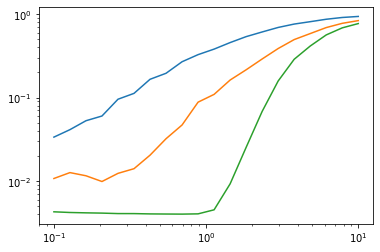

In [7]:
fig, ax = plt.subplots()
ax.loglog(1.0/sigmas, np.median(Es_add, axis=-1))
ax.loglog(1.0/sigmas, np.median(Es_mul, axis=-1))
ax.loglog(1.0/sigmas, np.median(Es_mlp, axis=-1))

In [5]:
def lstsq(A, Y):
    if Y.ndim == 1:
        Y = Y.reshape(-1, 1)
    n, m = A.shape
    d = Y.shape[1]
    ATA = A.T @ A + n * REG * np.eye(m)
    D = np.zeros((m, d))
    for i in range(d):
        D[:, i] = np.linalg.solve(ATA, A.T @ Y[:, i])
    return D

In [6]:
d = 5
N = 63
REG = 0.01

# Generate the basis
A = bases.mk_dlop_basis(d, N) * np.sqrt(0.5 * N)
A2D = np.einsum('ij,kl->ikjl', A, A)
A1D = np.concatenate((
    A2D[0, :].reshape(d, -1),
    A2D[:, 0].reshape(d, -1),
)).T
A2D_flat = A2D.reshape(d, d, N * N).T.reshape(N * N, d * d)

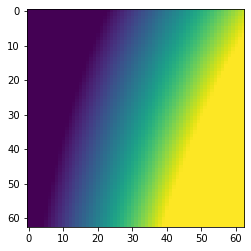

In [7]:
fig, ax = plt.subplots()
X = gen_2d_fun.gen_2d_fun(gen_2d_fun.mk_2d_flt(10.0, N), N, np.random)
ax.imshow(X, vmin=-1, vmax=1)

In [8]:
np.sqrt(np.mean(np.square(X)))

1.0

In [9]:
def noisy(As, rng):
    return As + np.sqrt(REG) * rng.randn(*As.shape)

def solve_additive(basis, tar, rng):
    return basis @ lstsq(noisy(basis, rng=rng), tar)

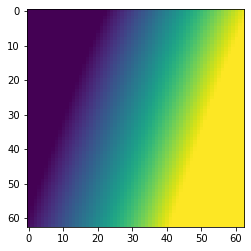

In [10]:
fig, ax = plt.subplots()
Y1 = solve_additive(A1D, X.reshape(-1), np.random).reshape(N, N)
ax.imshow(Y1, vmin=-1, vmax=1)

In [11]:
np.sqrt(np.mean(np.square(X - Y1)))

0.09879387289637379

In [100]:
Y1.shape

(63, 63)